# Analysis of Diabetes and its causes 

## Loading the data 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore") 

In [2]:
#import the data
db = pd.read_csv("diabetes.csv")

In [3]:
#view the first rows
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#view the last rows
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#get information on the name, type an amount of non-null values.
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#replace all ones with True and all zeros with False
db.Outcome.replace(1, True, inplace=True)
db.Outcome.replace(0,False,inplace = True )


## Exploratory data analysis 

### What is the ratio of patients with diabetes

In [7]:
def value_count (count,having = None,data=db ): 
    '''count the number of count that are similar 
    in having, in the data''' 
    if having != None:
        ans = data.groupby(having)[count].count()
    else: 
        ans = data.groupby(count)[count].count()
    return ans

This function counts the values of the **input** with **similarities** and in a given **data set**.

In [8]:
def percent (num, total= None ):
    ''' if type is int, get the percentage of 
    total, if array-like is passed, get the 
    individual percentages of elements in a sum 
    of list''' 
    if type(num) is int:
        ans = (num/total)*100 
    else:
       
        for i in num:
            
            ans = (num/sum(num))*100
    return ans
        

Calculates the pecentages of a given **data** out of the **total**.

In [9]:
out_vc=value_count("Outcome")
percent(out_vc)

Outcome
False    65.104167
True     34.895833
Name: Outcome, dtype: float64

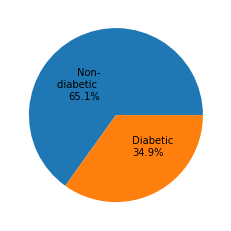

In [10]:
label1 = "Non-\ndiabetic \n" + str(round (percent(out_vc)[0], 1))+"%"
label2 = "Diabetic \n" + str(round(percent(out_vc)[1],1))+"%"
label_m = ["Diabetic","Non Diabetic"]
plt.pie(out_vc, labels=[label1,label2], labeldistance=0.4)
plt.show()

**65.1%** of the those interviewed were **Not Diabetic**, while **34.9%** of them were **Diabetic**.

## Analyse the age distribution of the candidates

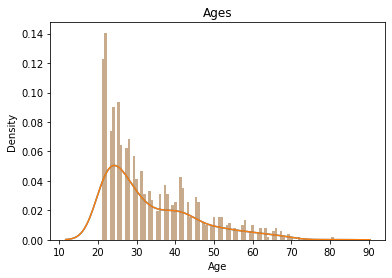

In [11]:
for i in [True,False]:
    sns.distplot(db["Age"],90)
plt.title("Ages")
plt.show()

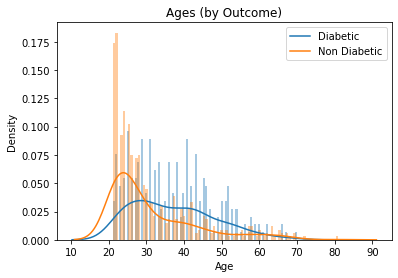

In [12]:
for i in [True,False]:
    db1=db[db["Outcome"] == i]
    sns.distplot(db1["Age"],90)
plt.legend(label_m)
plt.title("Ages (by Outcome)")
plt.show()

The distribution of the **ages** show a bias in the data. The data was majorly coallated from people between the ages of **20 to 25**. This might affect the analysis of the data.

## Analyse the distribution of pregnancies of the candidates

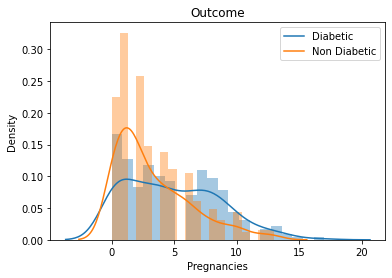

In [13]:
for i in [True,False]:
    db1=db[db["Outcome"] == i]
    sns.distplot(db1["Pregnancies"],20)
    
plt.legend(label_m)
plt.title("Outcome")
plt.show()

Most of the candidates without diabetes had had 0 to 5 **pregnancies**. Meanwhile, those with **diabetes** had had a fairly even spread of **pregnancies** between 0 and 10

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

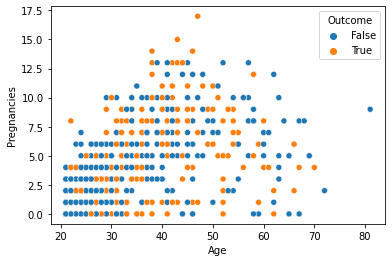

In [14]:
sns.scatterplot("Age","Pregnancies",hue= "Outcome",data= db)

The **older** the people get the more their **pregnancies** but pregnancies do not seem to affect the probability that the person has **diabetes**.

## Analyse the BMI of the candidates

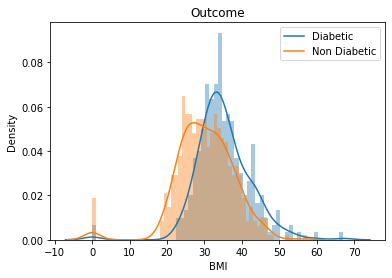

In [15]:
for i in [True,False]:
    db1=db[db["Outcome"] == i]
    sns.distplot(db1["BMI"],60,label=str(i))
plt.legend(label_m)
plt.title("Outcome")
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

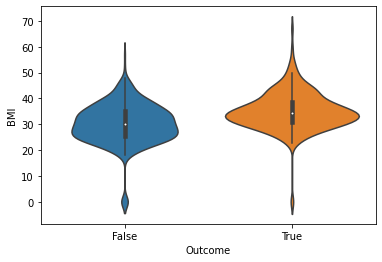

In [16]:
sns.violinplot("Outcome","BMI",data = db)

The distribution of the **BMI** for the **Diabetic** and **Non-diabetic** patients are similar, this suggests that **BMI** has no relationship with the **outcome**.

## Analyse the amount of Glucose intake of the candidates

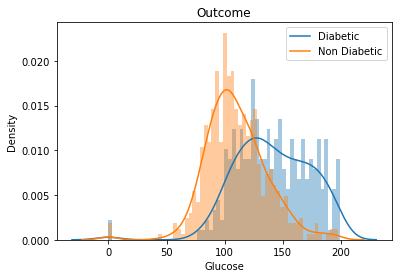

In [17]:
for i in [True,False]:
    db1=db[db["Outcome"] == i]
    sns.distplot(db1["Glucose"],60)
plt.legend(label_m)
plt.title("Outcome")
plt.show()

Most of those **without Diabetes** have a glucose intake of about **100g**. The density of the glucose intake of those with **diabetes** shifted further to the right showing that those with **diabetes** had **high levels of glucose**. 


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

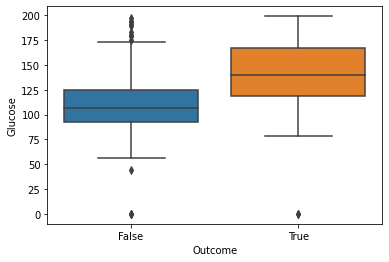

In [18]:
sns.boxplot(y="Glucose",x="Outcome",data = db)
plt.xticks()

Those with diabetes tend to have more glucose than those without further suggesting that higher glucose in **higher** chance of getting **diabetes**.

*But I am not convinced. The age was not evenly distributed. If it was, I think the number of non-diabetic patients would decrease.*

In [19]:

def even_age(col=db["Age"]): 
    ''' evens out the distribution of the age ''' 
    s = sorted(col.unique()) 
    even=np.random.uniform(np.min(col),np.max(col),size = len(col)+200)
 
    sample = []
    for i in even: 
        i = int (i)
        if i in s:
            sample.append(i)
            if len(sample) == len (col):
                 break 
    return sample
sample = even_age()

<AxesSubplot:ylabel='Density'>

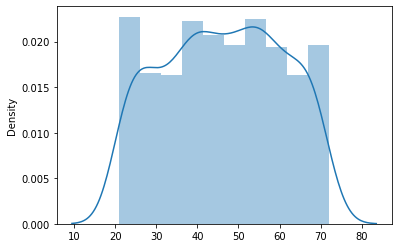

In [20]:
#display the distribution of ages
sns.distplot(sample)

I have created a new **Age** data with fairly uniform distribution.

In [21]:
def bs_repl (col = db["Age"]): 
    '''get the sample and original_outcome
    if sample size > original_outcome
    truncate original outcome to produce the new outcome
    if sample size < original_outcome
    fill the new_outcome with original outcome values 
    but possessing the same ratio of True:False '''
    #list to hold new outcome
    new_out = []
    
    #iterate over the ordered unique values of column (db.Age)
    for o in sorted(col.unique()): 
        
        #get all the values of outcome for each value of the Age (o)
        db_out = db.Outcome[col == o]
        
        #get the number of the same value of Age (o) in sample
        sam_age_sum = np.isin(sample,o).sum()
        
       
        r = db_out.sum()/len(db_out)
        ratio = [r,1-r]
            
        #add a new set with unique size of sam_age_sum fairly the same ratio 
        #of True:False as in original outcome
        q = list(np.random.choice(a=[True,False],p=ratio, size=sam_age_sum))
        new_out=new_out+q 
            
    return new_out

Here, I created a set of outcomes for every unique element of the new **Age** data.

- The size of the set of each unique value was to correspond with the size of its counterpart in the new **Age** data.
- The ratio of **True : False** was to correspond with the ratio in old **Age** data.

In [22]:
bs_reps = []

for num in range(500):
    w = bs_repl()
    
    #fraction of True against False
    x = [np.sum(w)/len(w),1-(np.sum(w)/len(w))]
    
    #0 is True, 1 is False
    bs_reps.append(round (percent(x)[1], 1))

In [23]:
len(bs_reps)

500

I reran this code to extract a list containing the **500** percentages of bootstrapped **False[s]** (Non-diabetic patients). 

In [24]:
x = percent(out_vc)[0]
#0 is false, 1 is True 
x

65.10416666666666

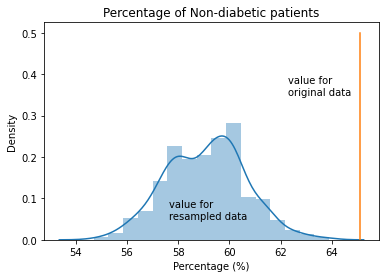

In [25]:
sns.distplot(bs_reps)
plt.plot([x,x],[0,0.5])
plt.xlabel('Percentage (%)')
plt.annotate('value for\nresampled data',[np.median(bs_reps)-1.5,0.05])
plt.annotate('value for\noriginal data', [62.3,0.35])
plt.title('Percentage of Non-diabetic patients')
plt.show()


The plot above shows that when the ages are uniformly distributed, the number (percentage) of people **without diabetes is lower than the original data** which also means that the number **with diabetes is a bit higher**.

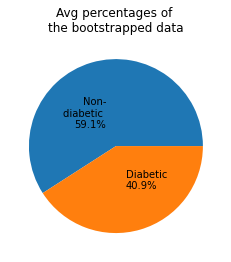

In [26]:
bs= [np.mean(bs_reps),100-(np.mean(bs_reps))]
label1 = "Non-\ndiabetic \n" + str(round (bs[0], 1))+"%"
label2 = "Diabetic \n" + str(round(bs [1],1))+"%"
plt.title("Avg percentages of \nthe bootstrapped data")
plt.pie(bs,labels=[label1,label2],labeldistance=0.4)
plt.show()

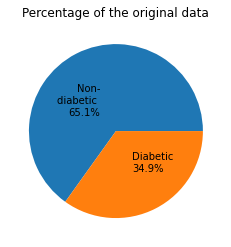

In [27]:
label1 = "Non-\ndiabetic \n" + str(round (percent(out_vc)[0], 1))+"%"
label2 = "Diabetic \n" + str(round(percent(out_vc)[1],1))+"%"
label_m = ["Diabetic","Non Diabetic"]
plt.title("Percentage of the original data")
plt.pie(out_vc, labels=[label1,label2], labeldistance=0.4)
plt.show()